# Training Session

In [1]:
import pickle

from build_vocab import *
from build_answers import *


In [2]:
# train2014
answers_path = '/home/ubuntu/dotCuda/notebook/answers.pkl'
with open(answers_path, 'rb') as f:
    answers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/vocab.pkl'
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
    
# val2014
answers_path = '/home/ubuntu/dotCuda/notebook/valanswers.pkl'
with open(answers_path, 'rb') as f:
    valanswers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/valvocab.pkl'
with open(vocab_path, 'rb') as f:
    valvocab = pickle.load(f)

In [3]:
from dataset import *

train_dataset = COCODataset(vocab=vocab, answers=answers)
val_dataset = COCODataset(vocab=valvocab, answers=valanswers)

loading VQA annotations and questions into memory...
0:00:07.412888
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:08.230801
creating index...
index created!


### Network Model

In [4]:
# import network 
from network_v5 import *

In [5]:
import torch
device = torch.device('cuda')

vocab_size = len(vocab)
model = ConcatNet(vocab_size).to(device)

#state_dict = torch.load('model_epoch4.pt')
#model.load_state_dict(state_dict)

### Trainer Class

In [6]:
# import trainer
from trainer import VQATrainer

trainer = VQATrainer(model, device)

### Train!

In [10]:
trained_model, statistics = trainer.train(train_dataset, val_dataset, save_every=50, collate_fn=collate, e_break=1, epoch=100)

Epoch 0 of 100
  Training...
   >> Epoch finished with loss 64.04946 and accuracy 0.000 in 0.6477s
  Validating...
   >> Epoch finished with loss 64.05019 and accuracy 0.000 in 0.6472s
Epoch 1 of 100
  Training...
   >> Epoch finished with loss 64.04808 and accuracy 0.000 in 0.6806s
  Validating...
   >> Epoch finished with loss 64.05015 and accuracy 0.000 in 0.6161s
Epoch 2 of 100
  Training...
   >> Epoch finished with loss 64.05132 and accuracy 0.000 in 0.6948s
  Validating...
   >> Epoch finished with loss 64.05013 and accuracy 0.000 in 0.6152s
Epoch 3 of 100
  Training...
   >> Epoch finished with loss 64.04842 and accuracy 0.000 in 0.6808s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903916c50>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05012 and accuracy 0.000 in 0.4984s
Epoch 4 of 100
  Training...
   >> Epoch finished with loss 64.05336 and accuracy 0.000 in 0.6370s
  Validating...
   >> Epoch finished with loss 64.05013 and accuracy 0.000 in 0.6246s
Epoch 5 of 100
  Training...
   >> Epoch finished with loss 64.04667 and accuracy 0.000 in 0.6502s
  Validating...
   >> Epoch finished with loss 64.05013 and accuracy 0.000 in 0.6062s
Epoch 6 of 100
  Training...
   >> Epoch finished with loss 64.04759 and accuracy 0.000 in 0.6392s
  Validating...
   >> Epoch finished with loss 64.05014 and accuracy 0.000 in 0.6187s
Epoch 7 of 100
  Training...
   >> Epoch finished with loss 64.04559 and accuracy 0.000 in 0.6517s
  Validating...
   >> Epoch finished with loss 64.05016 and accuracy 0.000 in 0.6106s
Epoch 8 of 100
  Training...
   >> Epoch finished with loss 64.05062 and accuracy 0.000 in 0.6362s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa90395a4e0>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05016 and accuracy 0.000 in 0.4995s
Epoch 9 of 100
  Training...
   >> Epoch finished with loss 64.04562 and accuracy 0.000 in 0.6818s
  Validating...
   >> Epoch finished with loss 64.05017 and accuracy 0.000 in 0.6346s
Epoch 10 of 100
  Training...
   >> Epoch finished with loss 64.04855 and accuracy 0.000 in 0.7159s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa90395a4e0>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05020 and accuracy 0.000 in 0.4709s
Epoch 11 of 100
  Training...
   >> Epoch finished with loss 64.05029 and accuracy 0.000 in 0.6318s
  Validating...
   >> Epoch finished with loss 64.05024 and accuracy 0.000 in 0.6648s
Epoch 12 of 100
  Training...
   >> Epoch finished with loss 64.05133 and accuracy 0.000 in 0.6349s
  Validating...
   >> Epoch finished with loss 64.05027 and accuracy 0.000 in 0.6237s
Epoch 13 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04574 and accuracy 0.000 in 0.5335s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05031 and accuracy 0.000 in 0.5031s
Epoch 14 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04617 and accuracy 0.000 in 0.5299s
  Validating...
   >> Epoch finished with loss 64.05033 and accuracy 0.000 in 0.6379s
Epoch 15 of 100
  Training...
   >> Epoch finished with loss 64.05161 and accuracy 0.000 in 0.6371s
  Validating...
   >> Epoch finished with loss 64.05034 and accuracy 0.000 in 0.6509s
Epoch 16 of 100
  Training...
   >> Epoch finished with loss 64.04893 and accuracy 0.000 in 0.6570s
  Validating...
   >> Epoch finished with loss 64.05036 and accuracy 0.000 in 0.6043s
Epoch 17 of 100
  Training...
   >> Epoch finished with loss 64.04795 and accuracy 0.000 in 0.6244s
  Validating...
   >> Epoch finished with loss 64.05038 and accuracy 0.000 in 0.6100s
Epoch 18 of 100
  Training...
   >> Epoch finished with loss 64.05183 and accuracy 0.000 in 0.6461s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05038 and accuracy 0.000 in 0.4998s
Epoch 19 of 100
  Training...
   >> Epoch finished with loss 64.04798 and accuracy 0.000 in 0.6706s
  Validating...
   >> Epoch finished with loss 64.05038 and accuracy 0.000 in 0.5942s
Epoch 20 of 100
  Training...
   >> Epoch finished with loss 64.04942 and accuracy 0.000 in 0.6344s
  Validating...
   >> Epoch finished with loss 64.05037 and accuracy 0.000 in 0.6266s
Epoch 21 of 100
  Training...
   >> Epoch finished with loss 64.04736 and accuracy 0.000 in 0.6472s
  Validating...
   >> Epoch finished with loss 64.05037 and accuracy 0.000 in 0.6579s
Epoch 22 of 100
  Training...
   >> Epoch finished with loss 64.04658 and accuracy 0.000 in 0.6548s
  Validating...
   >> Epoch finished with loss 64.05038 and accuracy 0.000 in 0.6213s
Epoch 23 of 100
  Training...
   >> Epoch finished with loss 64.04572 and accuracy 0.000 in 0.6314s
  Validating...
   >> Epoch finished with loss 64.05039 and accuracy 0.000 in 0.6174s


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04489 and accuracy 0.000 in 0.5181s
  Validating...
   >> Epoch finished with loss 64.05036 and accuracy 0.000 in 0.6087s
Epoch 44 of 100
  Training...
   >> Epoch finished with loss 64.04637 and accuracy 0.000 in 0.6467s
  Validating...
   >> Epoch finished with loss 64.05033 and accuracy 0.000 in 0.6290s
Epoch 45 of 100
  Training...
   >> Epoch finished with loss 64.04744 and accuracy 0.000 in 0.6461s
  Validating...
   >> Epoch finished with loss 64.05033 and accuracy 0.000 in 0.6007s
Epoch 46 of 100
  Training...
   >> Epoch finished with loss 64.04862 and accuracy 0.000 in 0.6594s
  Validating...
   >> Epoch finished with loss 64.05032 and accuracy 0.000 in 0.6267s
Epoch 47 of 100
  Training...
   >> Epoch finished with loss 64.04684 and accuracy 0.000 in 0.6529s
  Validating...
   >> Epoch finished with loss 64.05032 and accuracy 0.000 in 0.6182s
Epoch 48 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04355 and accuracy 0.000 in 0.5279s
  Validating...
   >> Epoch finished with loss 64.05032 and accuracy 0.000 in 0.6319s
Epoch 49 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04700 and accuracy 0.000 in 0.5361s
  Validating...
   >> Epoch finished with loss 64.05032 and accuracy 0.000 in 0.6136s
Epoch 50 of 100
  Training...
   >> Epoch finished with loss 64.04736 and accuracy 0.000 in 0.6463s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05032 and accuracy 0.000 in 0.5092s
Epoch 51 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04883 and accuracy 0.000 in 0.5262s
  Validating...
   >> Epoch finished with loss 64.05032 and accuracy 0.000 in 0.6049s
Epoch 52 of 100
  Training...
   >> Epoch finished with loss 64.04617 and accuracy 0.000 in 0.6211s
  Validating...
   >> Epoch finished with loss 64.05030 and accuracy 0.000 in 0.6087s
Epoch 53 of 100
  Training...
   >> Epoch finished with loss 64.04654 and accuracy 0.000 in 0.6544s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05031 and accuracy 0.000 in 0.4960s
Epoch 54 of 100
  Training...
   >> Epoch finished with loss 64.04597 and accuracy 0.000 in 0.6777s
  Validating...
   >> Epoch finished with loss 64.05030 and accuracy 0.000 in 0.6633s
Epoch 55 of 100
  Training...
   >> Epoch finished with loss 64.04375 and accuracy 0.000 in 0.6459s
  Validating...
   >> Epoch finished with loss 64.05029 and accuracy 0.000 in 0.6274s
Epoch 56 of 100
  Training...
   >> Epoch finished with loss 64.04526 and accuracy 0.000 in 0.6585s
  Validating...
   >> Epoch finished with loss 64.05029 and accuracy 0.000 in 0.6292s
Epoch 57 of 100
  Training...
   >> Epoch finished with loss 64.04860 and accuracy 0.000 in 0.6309s
  Validating...
   >> Epoch finished with loss 64.05029 and accuracy 0.000 in 0.6148s
Epoch 58 of 100
  Training...
   >> Epoch finished with loss 64.04485 and accuracy 0.000 in 0.7024s
  Validating...
   >> Epoch finished with loss 64.05029 and accuracy 0.000 in 0.6632s


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/

   >> Epoch finished with loss 64.05025 and accuracy 0.000 in 0.5111s
Epoch 62 of 100
  Training...
   >> Epoch finished with loss 64.04222 and accuracy 0.000 in 0.6179s
  Validating...
   >> Epoch finished with loss 64.05025 and accuracy 0.000 in 0.6298s
Epoch 63 of 100
  Training...
   >> Epoch finished with loss 64.04831 and accuracy 0.000 in 0.7042s
  Validating...
   >> Epoch finished with loss 64.05023 and accuracy 0.000 in 0.6232s
Epoch 64 of 100
  Training...
   >> Epoch finished with loss 64.04570 and accuracy 0.000 in 0.6303s
  Validating...
   >> Epoch finished with loss 64.05023 and accuracy 0.000 in 0.6256s
Epoch 65 of 100
  Training...
   >> Epoch finished with loss 64.04430 and accuracy 0.000 in 0.6484s
  Validating...
   >> Epoch finished with loss 64.05022 and accuracy 0.000 in 0.6077s
Epoch 66 of 100
  Training...
   >> Epoch finished with loss 64.04522 and accuracy 0.000 in 0.6514s
  Validating...
   >> Epoch finished with loss 64.05021 and accuracy 0.000 in 0.6162s


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05021 and accuracy 0.000 in 0.4950s
Epoch 68 of 100
  Training...
   >> Epoch finished with loss 64.04165 and accuracy 0.000 in 0.6597s
  Validating...
   >> Epoch finished with loss 64.05020 and accuracy 0.000 in 0.6321s
Epoch 69 of 100
  Training...
   >> Epoch finished with loss 64.04214 and accuracy 0.000 in 0.6376s
  Validating...
   >> Epoch finished with loss 64.05019 and accuracy 0.000 in 0.6070s
Epoch 70 of 100
  Training...
   >> Epoch finished with loss 64.04234 and accuracy 0.000 in 0.6506s
  Validating...
   >> Epoch finished with loss 64.05018 and accuracy 0.000 in 0.6120s
Epoch 71 of 100
  Training...
   >> Epoch finished with loss 64.05029 and accuracy 0.000 in 0.6329s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05019 and accuracy 0.000 in 0.4956s
Epoch 72 of 100
  Training...
   >> Epoch finished with loss 64.04490 and accuracy 0.000 in 0.6410s
  Validating...
   >> Epoch finished with loss 64.05017 and accuracy 0.000 in 0.6234s
Epoch 73 of 100
  Training...
   >> Epoch finished with loss 64.04665 and accuracy 0.000 in 0.6506s
  Validating...
   >> Epoch finished with loss 64.05016 and accuracy 0.000 in 0.6470s
Epoch 74 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04468 and accuracy 0.000 in 0.5098s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.05016 and accuracy 0.000 in 0.4937s
Epoch 75 of 100
  Training...
   >> Epoch finished with loss 64.04610 and accuracy 0.000 in 0.6176s
  Validating...
   >> Epoch finished with loss 64.05013 and accuracy 0.000 in 0.6343s
Epoch 76 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04243 and accuracy 0.000 in 0.5178s
  Validating...
   >> Epoch finished with loss 64.05013 and accuracy 0.000 in 0.6198s
Epoch 77 of 100
  Training...
   >> Epoch finished with loss 64.04047 and accuracy 0.000 in 0.6238s
  Validating...
   >> Epoch finished with loss 64.05012 and accuracy 0.000 in 0.6148s
Epoch 78 of 100
  Training...
   >> Epoch finished with loss 64.04522 and accuracy 0.000 in 0.6665s
  Validating...
   >> Epoch finished with loss 64.05010 and accuracy 0.000 in 0.6120s
Epoch 79 of 100
  Training...
   >> Epoch finished with loss 64.04326 and accuracy 0.000 in 0.6289s
  Validating...
   >> Epoch finished with loss 64.05009 and accuracy 0.000 in 0.6373s
Epoch 80 of 100
  Training...
   >> Epoch finished with loss 64.04831 and accuracy 0.000 in 0.6722s
  Validating...
   >> Epoch finished with loss 64.05009 and accuracy 0.000 in 0.6121s
Epoch 81 of 100
  Training...
   >> Epoch finished with loss 64.04279 and accuracy 0.000 in 0.6512s


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04398 and accuracy 0.000 in 0.5281s
  Validating...
   >> Epoch finished with loss 64.05006 and accuracy 0.000 in 0.6085s
Epoch 84 of 100
  Training...
   >> Epoch finished with loss 64.04341 and accuracy 0.000 in 0.6348s
  Validating...
   >> Epoch finished with loss 64.05005 and accuracy 0.000 in 0.6141s
Epoch 85 of 100
  Training...
   >> Epoch finished with loss 64.04154 and accuracy 0.000 in 0.6222s
  Validating...
   >> Epoch finished with loss 64.05006 and accuracy 0.000 in 0.6163s
Epoch 86 of 100
  Training...
   >> Epoch finished with loss 64.04565 and accuracy 0.000 in 0.6318s
  Validating...
   >> Epoch finished with loss 64.05004 and accuracy 0.000 in 0.6067s
Epoch 87 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04372 and accuracy 0.000 in 0.5242s
  Validating...
   >> Epoch finished with loss 64.05003 and accuracy 0.000 in 0.6481s
Epoch 88 of 100
  Training...
   >> Epoch finished with loss 64.04344 and accuracy 0.000 in 0.6879s
  Validating...
   >> Epoch finished with loss 64.05002 and accuracy 0.000 in 0.6281s
Epoch 89 of 100
  Training...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04165 and accuracy 0.000 in 0.5178s
  Validating...
   >> Epoch finished with loss 64.05000 and accuracy 0.000 in 0.6125s
Epoch 90 of 100
  Training...
   >> Epoch finished with loss 64.04350 and accuracy 0.000 in 0.6446s
  Validating...
   >> Epoch finished with loss 64.04998 and accuracy 0.000 in 0.6100s
Epoch 91 of 100
  Training...
   >> Epoch finished with loss 64.04327 and accuracy 0.000 in 0.6698s
  Validating...
   >> Epoch finished with loss 64.04999 and accuracy 0.000 in 0.6270s
Epoch 92 of 100
  Training...
   >> Epoch finished with loss 64.03993 and accuracy 0.000 in 0.6375s
  Validating...
   >> Epoch finished with loss 64.04996 and accuracy 0.000 in 0.6757s
Epoch 93 of 100
  Training...
   >> Epoch finished with loss 64.04167 and accuracy 0.000 in 0.6540s
  Validating...
   >> Epoch finished with loss 64.04996 and accuracy 0.000 in 0.6299s
Epoch 94 of 100
  Training...
   >> Epoch finished with loss 64.04437 and accuracy 0.000 in 0.6601s


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04996 and accuracy 0.000 in 0.4654s
Epoch 96 of 100
  Training...
   >> Epoch finished with loss 64.04284 and accuracy 0.000 in 0.6536s
  Validating...


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fa903a113c8>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/ubuntu/anaconda3/envs/AI_Proj/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/ubuntu/anacon

   >> Epoch finished with loss 64.04993 and accuracy 0.000 in 0.5914s
Epoch 97 of 100
  Training...
   >> Epoch finished with loss 64.04399 and accuracy 0.000 in 0.6580s
  Validating...
   >> Epoch finished with loss 64.04992 and accuracy 0.000 in 0.6242s
Epoch 98 of 100
  Training...
   >> Epoch finished with loss 64.04639 and accuracy 0.000 in 0.6290s
  Validating...
   >> Epoch finished with loss 64.04991 and accuracy 0.000 in 0.6169s
Epoch 99 of 100
  Training...
   >> Epoch finished with loss 64.04174 and accuracy 0.000 in 0.6830s
  Validating...
   >> Epoch finished with loss 64.04990 and accuracy 0.000 in 0.6187s


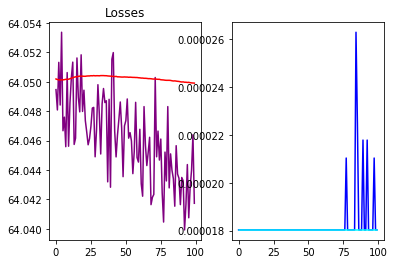

In [11]:
# import pickle

# with open('stats.st', 'rb') as statfile:
#     statistic = pickle.load(statfile)
    
# #print(statistic)

# #trainer.plot_over_epoch()
# from trainer import VQATrainer

# trainer = VQATrainer(None, None)
# trainer.statistics = statistic

trainer.plot_over_epoch()

In [9]:
from torchvision import transforms
import matplotlib.pyplot as plt
import random

for idx in range(8):[random.randint(0, 8) for i in range(8)]:
    print('\nqn no', idx)
    qns, img, ans = collate([train_dataset[idx]])
    output = model(img.cuda(), qns.long().cuda())
    _, pred = output.topk(10)
    # print(qns, pred)

    #pil_img = transforms.ToPILImage()(img)
    #plt.imshow(pil_img)
    qnss = ' '.join([vocab.idx2word[i.item()] for i in qns.data])
    ans = ' / '.join([answers.idx2ans[j.item()] for j in pred[0]])
    print('question:', qnss)
    print('answer:', ans)

SyntaxError: invalid syntax (<ipython-input-9-a5cb0d8dbd9c>, line 5)